# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read instagram
insta_df = pd.read_csv('./Clean_Data/merged_instagram_data_cleaned.csv')

# read tiktok
tiktok_df = pd.read_csv('./Clean_Data/merged_tiktok_data_cleaned.csv')

# read youtube
youtube_df = pd.read_csv('./Clean_Data/merged_youtube_data_cleaned.csv')

In [7]:
insta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4933 entries, 0 to 4932
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sno                       4933 non-null   float64
 1   instagram_name            4933 non-null   object 
 2   name                      2938 non-null   object 
 3   subscribers               4933 non-null   int64  
 4   audience_country          1976 non-null   object 
 5   authentic_engagement      1979 non-null   object 
 6   engagement_average        1000 non-null   object 
 7   category_1                4933 non-null   object 
 8   category_2                4933 non-null   object 
 9   influencer_insta_name     979 non-null    object 
 10  audience_country(mostly)  965 non-null    object 
 11  engagement_avg            979 non-null    object 
 12  rank                      4933 non-null   float64
 13  eng_(auth)                1959 non-null   object 
 14  eng_(avg

In [8]:
tiktok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sno                3986 non-null   float64
 1   tiktoker_name      3986 non-null   object 
 2   tiktok_name        3986 non-null   object 
 3   subscribers        3986 non-null   int64  
 4   views_avg          3986 non-null   float64
 5   likes_avg          3986 non-null   float64
 6   comments_avg       3986 non-null   float64
 7   shares_avg         3986 non-null   float64
 8   subscribers_count  987 non-null    object 
 9   rank               3986 non-null   float64
 10  views_average      1000 non-null   object 
 11  likes_average      1000 non-null   object 
 12  comments_average   1000 non-null   object 
 13  shares_average     1000 non-null   object 
 14  row-cell           3986 non-null   float64
 15  followers          1000 non-null   object 
 16  views_(avg)        3986 

In [9]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sno                1972 non-null   float64
 1   name               0 non-null      float64
 2   youtuber_name      1972 non-null   object 
 3   audience_country   1972 non-null   object 
 4   subscribers        1972 non-null   int64  
 5   category_2         1972 non-null   object 
 6   avg_views          1972 non-null   float64
 7   avg_likes          1972 non-null   float64
 8   avg_comments       1972 non-null   float64
 9   category_3         1972 non-null   object 
 10  channel_name       0 non-null      float64
 11  category           0 non-null      float64
 12  youtube_channel    1972 non-null   object 
 13  category_1         1972 non-null   object 
 14  country            1630 non-null   object 
 15  views_(avg)        1972 non-null   float64
 16  likes_(avg)        1972 

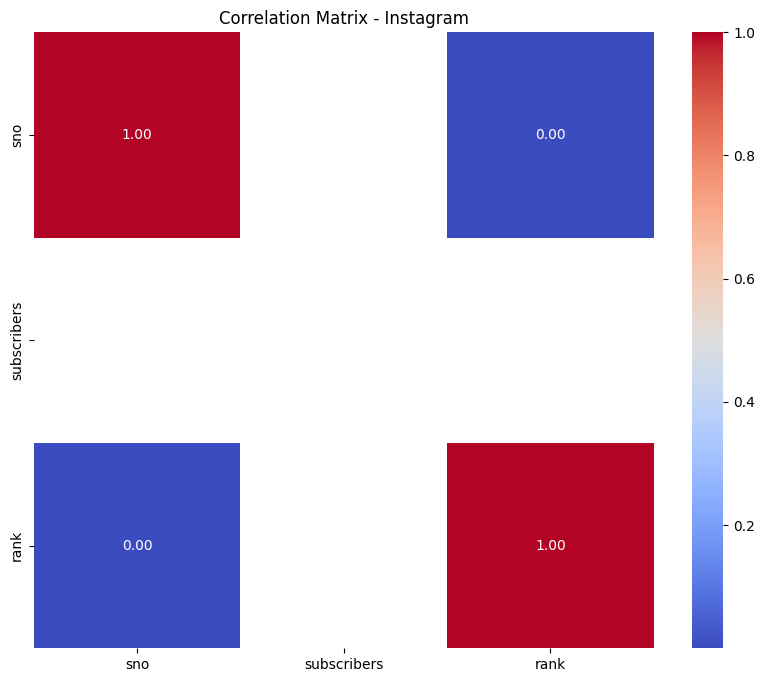

In [3]:
# --- Correlation Heatmap (Instagram) ---
if insta_df is not None:
    numeric_cols_insta = insta_df.select_dtypes(include=['number'])
    correlation_insta = numeric_cols_insta.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_insta, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix - Instagram')
    plt.show()

In [5]:
# --- Engagement Rate Calculation (Instagram - Example) ---
if insta_df is not None and 'likes_avg' in insta_df.columns and 'comments_avg' in insta_df.columns and 'subscribers' in insta_df.columns:
    insta_df['total_engagement'] = insta_df['likes_avg'].fillna(0) + insta_df['comments_avg'].fillna(0) # Define engagement
    insta_df['engagement_rate'] = (insta_df['total_engagement'] / insta_df['subscribers']) * 100
    print("\nInstagram Engagement Rate (Example):\n", insta_df[['instagram_name', 'subscribers', 'total_engagement', 'engagement_rate']].head())

TypeError: can only concatenate str (not "int") to str


Average Subscribers by Top YouTube Category 1:
 category_1
ASMR                    0.0
Health & Self Help      0.0
Unknown                 0.0
Travel                  0.0
Toys                    0.0
Sports                  0.0
Science & Technology    0.0
News & Politics         0.0
Music & Dance           0.0
Movies                  0.0
Name: subscribers, dtype: float64


C:\Users\lualg\AppData\Local\Temp\ipykernel_34948\3554509816.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_subs_by_yt_category.index, y=avg_subs_by_yt_category.values, palette='viridis')


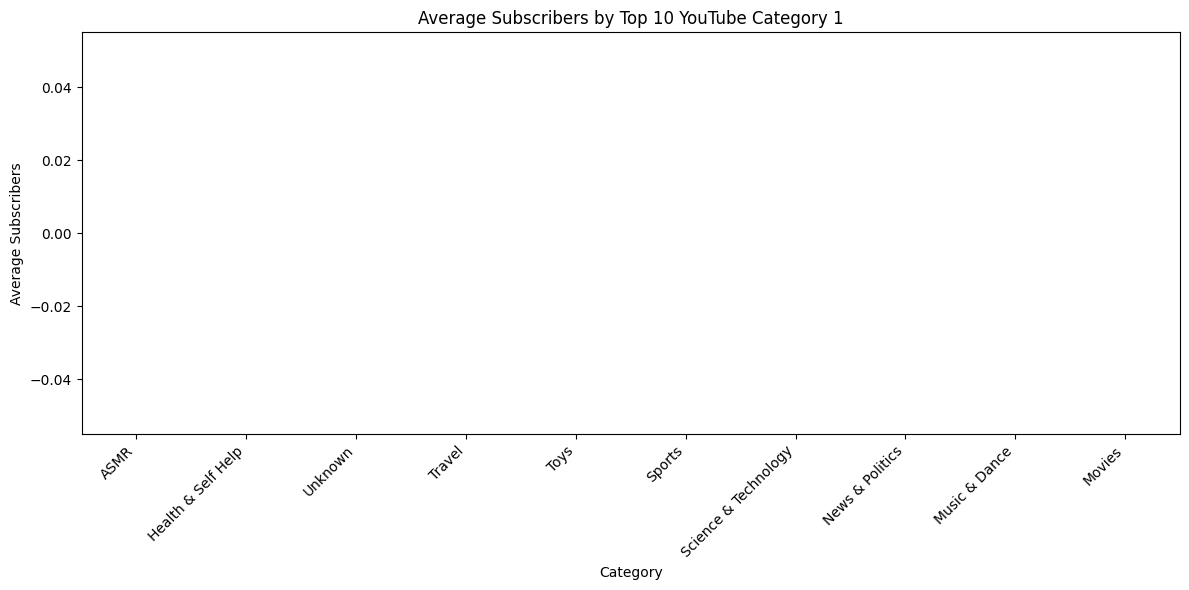

In [ ]:
# --- Category Performance (YouTube - Example) ---
if youtube_df is not None and 'category_1' in youtube_df.columns and 'subscribers' in youtube_df.columns:
    avg_subs_by_yt_category = youtube_df.groupby('category_1')['subscribers'].mean().sort_values(ascending=False).head(10)
    print("\nAverage Subscribers by Top YouTube Category 1:\n", avg_subs_by_yt_category)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_subs_by_yt_category.index, y=avg_subs_by_yt_category.values, palette='viridis')
    plt.title('Average Subscribers by Top 10 YouTube Category 1')
    plt.xlabel('Category')
    plt.ylabel('Average Subscribers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# --- Comparative Box Plot (Engagement Rate - Conceptual) ---
# (You'd need to calculate a comparable engagement rate for all platforms first)
if insta_df is not None and tiktok_df is not None and youtube_df is not None and 'engagement_rate' in insta_df.columns and 'engagement_rate' in tiktok_df.columns and 'engagement_rate' in youtube_df.columns:
    plt.figure(figsize=(10, 7))
    sns.boxplot(data=[insta_df['engagement_rate'], tiktok_df['engagement_rate'], youtube_df['engagement_rate']],
                names=['Instagram', 'TikTok', 'YouTube'])
    plt.title('Comparison of Engagement Rates Across Platforms')
    plt.ylabel('Engagement Rate (%)')
    plt.yscale('log') # Consider log scale if needed
    plt.show()

In [ ]:
# --- Category vs. Engagement Rate (Instagram - Box Plot) ---
if insta_df is not None and 'category_1' in insta_df.columns and 'engagement_rate' in insta_df.columns:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='category_1', y='engagement_rate', data=insta_df.nlargest(100, 'subscribers'), # Focus on top influencers
                order=insta_df['category_1'].value_counts().nlargest(10).index) # Order by category popularity
    plt.title('Engagement Rate Distribution by Top 10 Instagram Category')
    plt.xlabel('Category')
    plt.ylabel('Engagement Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# --- Correlation Heatmap (All Platforms Combined - If Meaningful) ---
# Be cautious - direct comparison might not be insightful due to platform differences
# If you have some common metrics after careful standardization:
combined_df = pd.concat([insta_df[['subscribers', 'engagement_rate', ...]].assign(platform='Instagram'),
                         tiktok_df[['subscribers', 'engagement_rate', ...]].assign(platform='TikTok'),
                         youtube_df[['subscribers', 'engagement_rate', ...]].assign(platform='YouTube')])
if 'engagement_rate' in combined_df.columns and 'subscribers' in combined_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='subscribers', y='engagement_rate', hue='platform', data=combined_df.sample(1000)) # Sample for clarity
    plt.title('Subscribers vs. Engagement Rate Across Platforms (Sample)')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

KeyError: "['engagement_rate', Ellipsis] not in index"

In [ ]:
# --- Engagement Rate Buckets (Instagram) ---
if insta_df is not None and 'engagement_rate' in insta_df.columns:
    bins = [0, 2, 5, 10, 20, 100] # Example bins
    labels = ['0-2%', '2-5%', '5-10%', '10-20%', '>20%']
    insta_df['engagement_level'] = pd.cut(insta_df['engagement_rate'], bins=bins, labels=labels, right=False)
    engagement_level_counts = insta_df['engagement_level'].value_counts().sort_index()
    print("\nInstagram Engagement Level Distribution:\n", engagement_level_counts)
    plt.figure(figsize=(8, 5))
    engagement_level_counts.plot(kind='bar')
    plt.title('Distribution of Engagement Levels on Instagram')
    plt.xlabel('Engagement Level')
    plt.ylabel('Number of Influencers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

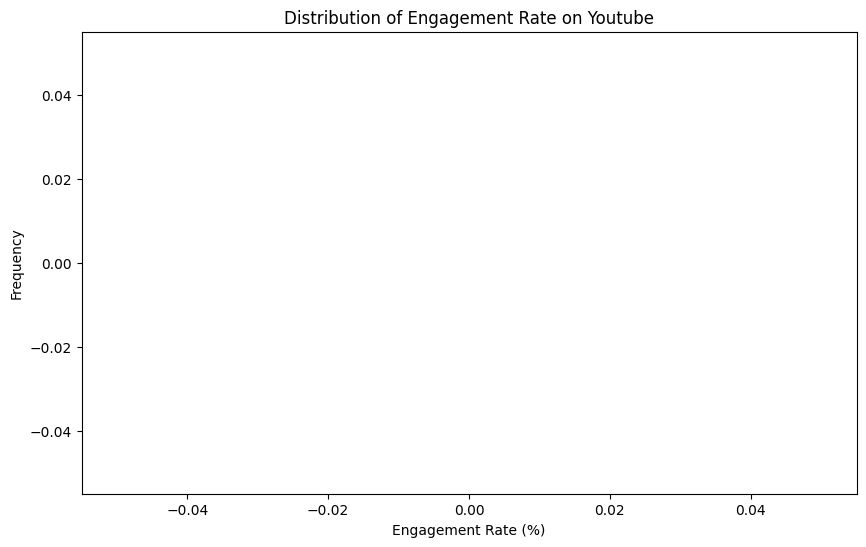

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 800x600 with 1 Axes>

ValueError: List of boxplot statistics and `positions` values must have same the length

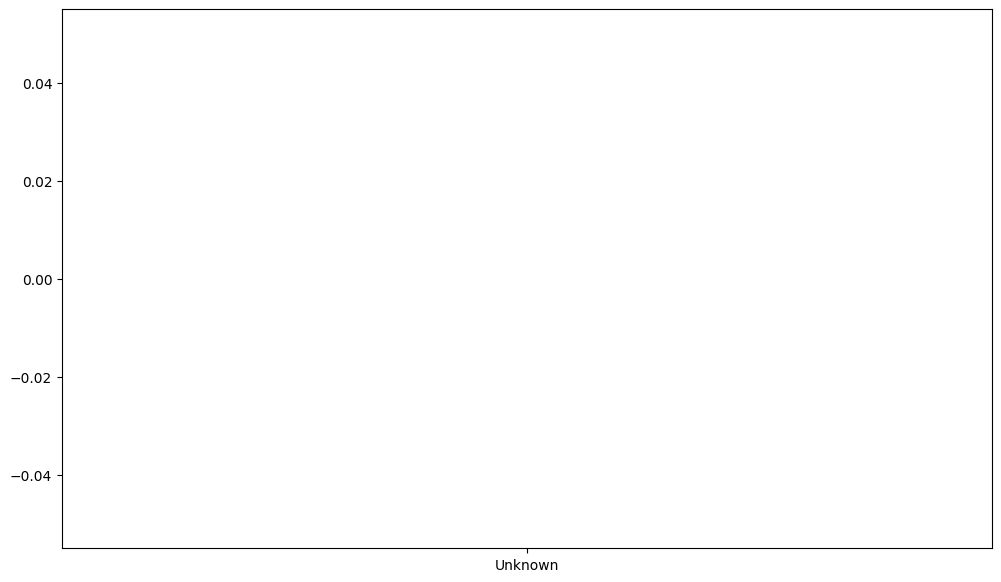

In [ ]:
#print(f"\n--- More Detailed Analysis for {platform_name} ---")

# --- Engagement Rate Analysis ---
if 'likes_avg' in youtube_df.columns and 'comments_avg' in youtube_df.columns and 'subscribers' in youtube_df.columns:
    youtube_df['total_engagement'] = youtube_df['likes_avg'].fillna(0) + youtube_df['comments_avg'].fillna(0)
    youtube_df['engagement_rate'] = (youtube_df['total_engagement'] / youtube_df['subscribers']) * 100
    #print(f"\nAverage Engagement Rate on {"Youtube"}: {youtube_df['engagement_rate'].mean():.2f}%")

    plt.figure(figsize=(10, 6))
    sns.histplot(youtube_df['engagement_rate'].replace([np.inf, -np.inf], np.nan).dropna(), bins=50, kde=True)
    plt.title(f'Distribution of Engagement Rate on {"Youtube"}')
    plt.xlabel('Engagement Rate (%)')
    plt.ylabel('Frequency')
    plt.show()

    # Correlation with Subscribers
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='subscribers', y='engagement_rate', data=youtube_df.replace([np.inf, -np.inf], np.nan).dropna())
    plt.title(f'Subscribers vs. Engagement Rate on {"Youtube"}')
    plt.xlabel('Subscribers')
    plt.ylabel('Engagement Rate (%)')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

# --- Category Analysis ---
category_col = 'category_1' if 'category_1' in youtube_df.columns else ('category' if 'category' in youtube_df.columns else None)
if category_col and youtube_df[category_col].nunique() > 1:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x=category_col, y='engagement_rate' if 'engagement_rate' in youtube_df.columns else 'subscribers',
                data=youtube_df.nlargest(200, 'subscribers'), # Focus on a subset
                order=youtube_df[category_col].value_counts().nlargest(10).index)
    plt.title(f'{"Youtube"}: Engagement Rate (or Subscribers) by Top 10 {category_col}')
    plt.xlabel('Category')
    plt.ylabel('Engagement Rate (%)' if 'engagement_rate' in youtube_df.columns else 'Subscribers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# --- Top Influencers by Multiple Metrics ---
top_n = 10
#print(f"\nTop {top_n} {"Youtube"} Influencers:")
for metric in ['subscribers', 'total_engagement' if 'total_engagement' in youtube_df.columns else None, 'engagement_rate' if 'engagement_rate' in youtube_df.columns else None]:
    if metric and metric in youtube_df.columns:
        top_influencers = youtube_df.sort_values(by=metric, ascending=False).head(top_n)
        name_col = [col for col in top_influencers.columns if 'name' in col or 'channel' in col][0] if any('name' in col or 'channel' in col for col in top_influencers.columns) else 'N/A'
        print(f"\nTop {top_n} by {metric}:")
        print(top_influencers[[name_col, metric]].fillna('N/A'))



--- More Detailed Analysis for TikTok ---

Average Engagement Rate on TikTok: nan%


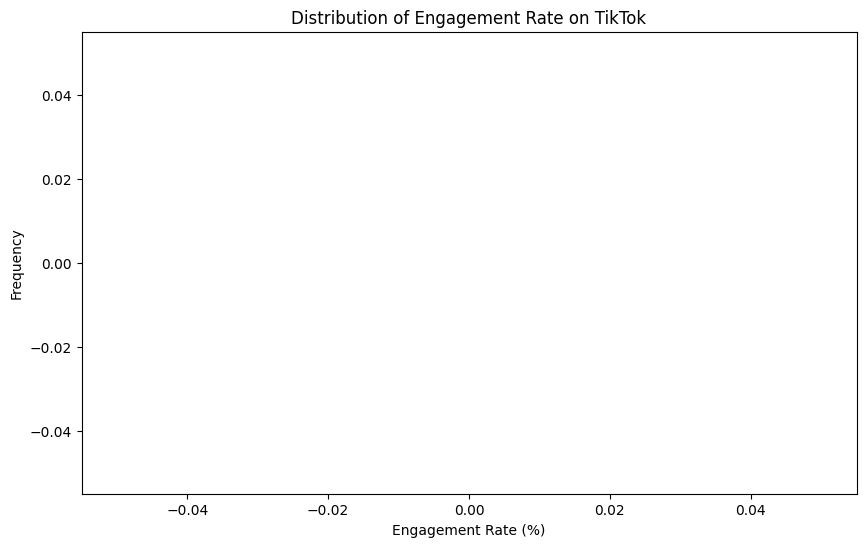

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 800x600 with 1 Axes>


Top 10 TikTok Influencers:

Top 10 by subscribers:
      tiktoker_name  subscribers
0     jypestraykids            0
2662     shailasabt            0
2649     eebruu____            0
2650   alpha.pookie            0
2651       na_rouch            0
2652   terjiah_loui            0
2653    emilyfauver            0
2654   ekosaputra20            0
2655       riaricis            0
2656     imlucastho            0

Top 10 by total_engagement:
             tiktoker_name  total_engagement
473                   bela            1918.0
877        rose.friederike            1904.0
498           daniuniverse            1823.0
873              zeinazeee            1810.0
776          cirowhites1.0            1803.0
500            alexwaarren            1801.0
934      abdullah_eltourky            1792.0
957       itsmenicksmithy2            1788.0
904  aureliehermansyahatta            1768.0
876            lilyxgarcia            1732.0

Top 10 by engagement_rate:
             tiktoker_name  engag

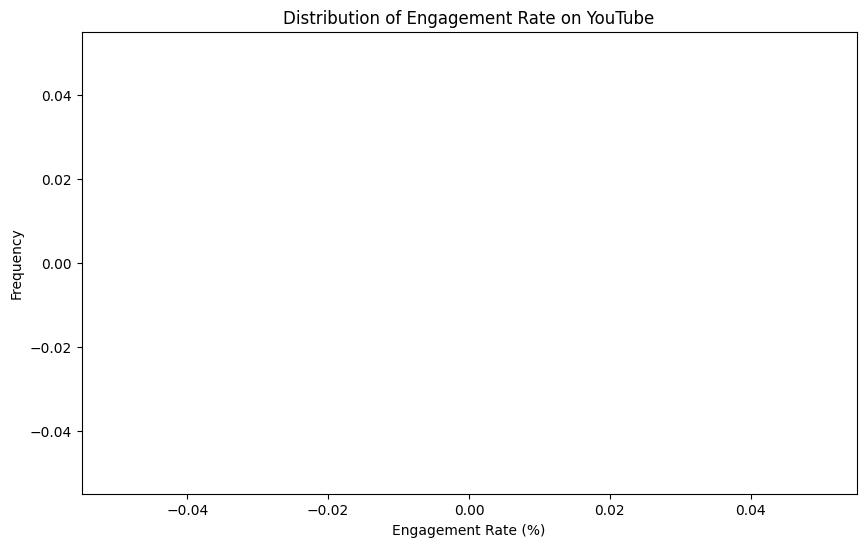

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 800x600 with 1 Axes>

ValueError: List of boxplot statistics and `positions` values must have same the length

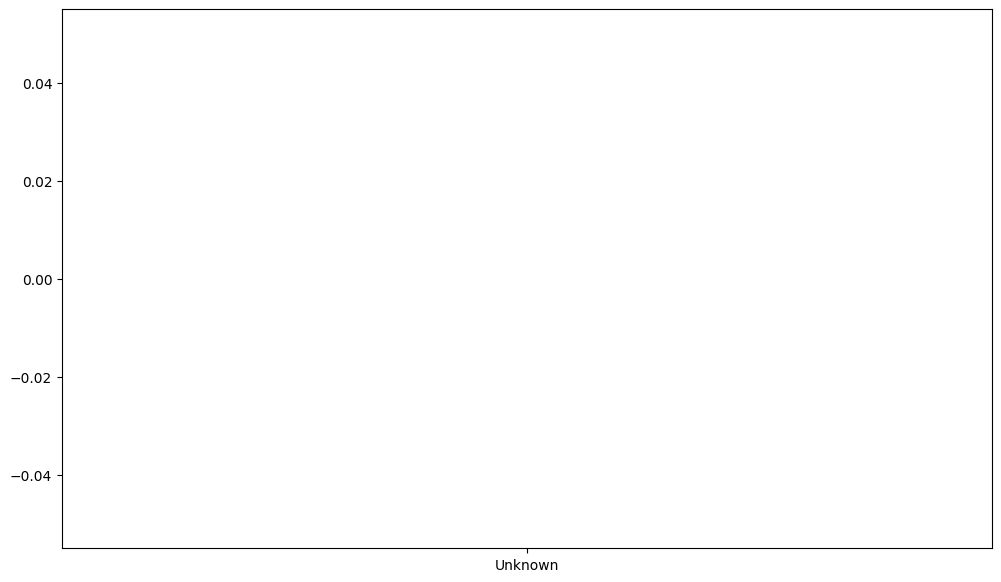

In [13]:
def analyze_platform(df, platform_name, name_col, subscriber_col, category_cols, like_col, comment_col, view_col=None, share_col=None):
    if df is not None and name_col in df.columns and subscriber_col in df.columns:
        print(f"\n--- More Detailed Analysis for {platform_name} ---")

        # --- Engagement Rate Analysis ---
        if like_col in df.columns and comment_col in df.columns and subscriber_col in df.columns:
            df['total_engagement'] = df[like_col].fillna(0) + df[comment_col].fillna(0)
            if view_col in df.columns:
                df['total_engagement'] += df[view_col].fillna(0) # Consider adding views
            if share_col in df.columns:
                df['total_engagement'] += df[share_col].fillna(0) # Consider adding shares
            df['engagement_rate'] = (df['total_engagement'] / df[subscriber_col]) * 100
            print(f"\nAverage Engagement Rate on {platform_name}: {df['engagement_rate'].replace([np.inf, -np.inf], np.nan).mean():.2f}%")

            plt.figure(figsize=(10, 6))
            sns.histplot(df['engagement_rate'].replace([np.inf, -np.inf], np.nan).dropna(), bins=50, kde=True)
            plt.title(f'Distribution of Engagement Rate on {platform_name}')
            plt.xlabel('Engagement Rate (%)')
            plt.ylabel('Frequency')
            plt.show()

            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=subscriber_col, y='engagement_rate', data=df.replace([np.inf, -np.inf], np.nan).dropna())
            plt.title(f'{subscriber_col} vs. Engagement Rate on {platform_name}')
            plt.xlabel(subscriber_col)
            plt.ylabel('Engagement Rate (%)')
            plt.xscale('log')
            plt.yscale('log')
            plt.show()

        # --- Category Analysis ---
        for cat_col in category_cols:
            if cat_col in df.columns and df[cat_col].nunique() > 1:
                plt.figure(figsize=(12, 7))
                sns.boxplot(x=cat_col, y='engagement_rate' if 'engagement_rate' in df.columns else subscriber_col,
                            data=df.nlargest(200, subscriber_col),
                            order=df[cat_col].value_counts().nlargest(10).index)
                plt.title(f'{platform_name}: Engagement Rate (or {subscriber_col}) by Top 10 {cat_col}')
                plt.xlabel('Category')
                plt.ylabel('Engagement Rate (%)' if 'engagement_rate' in df.columns else subscriber_col)
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()

        # --- Top Influencers by Multiple Metrics ---
        top_n = 10
        print(f"\nTop {top_n} {platform_name} Influencers:")
        for metric in [subscriber_col, 'total_engagement' if 'total_engagement' in df.columns else None, 'engagement_rate' if 'engagement_rate' in df.columns else None]:
            if metric and metric in df.columns:
                top_influencers = df.sort_values(by=metric, ascending=False).head(top_n)
                print(f"\nTop {top_n} by {metric}:")
                print(top_influencers[[name_col, metric]].fillna('N/A'))

    else:
        print(f"DataFrame or key columns not found for {platform_name}.")

# --- Analyze Instagram ---
# analyze_platform(insta_df,
#                  platform_name='Instagram',
#                  name_col='instagram_name',
#                  subscriber_col='subscribers',
#                  category_cols=['category_1', 'category_2'],
#                  like_col='likes_avg',
#                  comment_col='comments_avg',
#                  view_col='views_avg')

# --- Analyze TikTok ---
analyze_platform(tiktok_df,
                 platform_name='TikTok',
                 name_col='tiktoker_name',
                 subscriber_col='subscribers',
                 category_cols=[], # TikTok data doesn't have clear 'category' columns in the info
                 like_col='likes_avg',
                 comment_col='comments_avg',
                 view_col='views_avg',
                 share_col='shares_avg')

# --- Analyze YouTube ---
analyze_platform(youtube_df,
                 platform_name='YouTube',
                 name_col='youtuber_name',
                 subscriber_col='subscribers',
                 category_cols=['category_1', 'category_2', 'category_3', 'category'], # Include 'category' even though it's all null
                 like_col='likes_avg',
                 comment_col='comments_avg',
                 view_col='views_avg')